# Ste's first notebook: analyse Darren's DM paper using yaml files

### We are going to look at the DM paper and make some plots from its yaml files. We will use some intuitive containers which make our lives as easy as possible. The workflow is "load dataset --> associate each table of interest with a unique key (this allows us to correlate data between different tables) --> make validation plots." The containers can load data from multiple files, and in the future, multiple formats, allowing easy comparison of e.g. ROOT plots with yaml tables.

#### Before starting, make sure you are using a python3 server with the following packages.  I will figure out how to specify this in the notebook setup, but I think that we then need to have a permanet server... I'm not sure...

pip3 install numpy

pip3 install pyyaml

pip3 install scipy

pip3 install matplotlib

#### First step: import libraries

In [1]:
import os, sys, yaml
import general_utils.messaging as msg
import general_utils.helpers as hlp
import HEP_data_utils.helpers as HEPData_hlp
from HEP_data_utils.data_structures import *

#### Create a new "Distribution_store", and populate it with the contents of the yaml files

In [2]:
dataset = Distribution_store("Darren DM paper")
HEPData_hlp.load_dataset ( dataset , "../HEP_datasets/HEPData-ins1609448-v2-yaml/" )

INFO	HEP_data_utils.helpers.load_dataset	../HEP_datasets/HEPData-ins1609448-v2-yaml is a directory... I am expanding the entries (but will only go one directory deep!)
INFO	HEP_data_utils.helpers.load_dataset	submission.yaml file found in directory ../HEP_datasets/HEPData-ins1609448-v2-yaml... I will use this to steer the directory


#### Now look at the automatically-generated keys for each distribution...

In [3]:
dataset.print_keys()

INFO	Distribution_store.print_keys	keys for _distributions_1D are:
|10.17182/hepdata.78366.v2/t1|Table1.yaml|measured $R^\text{miss}$|
|10.17182/hepdata.78366.v2/t1|Table1.yaml|expected $R^\text{miss}$|
|10.17182/hepdata.78366.v2/t1|Table1.yaml|$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)|
|10.17182/hepdata.78366.v2/t1|Table1.yaml|$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)|
|10.17182/hepdata.78366.v2/t2|Table2.yaml|measured $R^\text{miss}$|
|10.17182/hepdata.78366.v2/t2|Table2.yaml|expected $R^\text{miss}$|
|10.17182/hepdata.78366.v2/t2|Table2.yaml|$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)|
|10.17182/hepdata.78366.v2/t2|Table2.yaml|$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)|
|10.17182/hepdata.78366.v2/t3|Table3.yaml|measured $R^\text{miss}$|
|10.17182/hepdata.78366.v2/t3|Table3.yaml|expected $R^\text{miss}$|
|10.17182/hepdata.783

#### Success - we found all of the tables stored within this directory. The automatic keys are designed to be unique and specify where the distribution was found. They have the format "|table-doi|file|heading within file|", and a suffix "-duplicated-auto-key;N" is added when multiple entries have the same key. These are not very nice to use... but fortunately we stored all possible metadata for each table. If we print this, it should give us some idea about what the table is.

In [4]:
dataset.print_meta("|10.17182/hepdata.78366.v2/t1|Table1.yaml|measured $R^\\text{miss}$|")

INFO	Distribution.print_meta	printing all metadata for object measured $R^\text{miss}$
LOCAL::data_file   :   Table1.yaml
LOCAL::description   :   Measured and expected $R^\text{miss}$ as a function of $p_\text{T}^\text{miss}$ in the $\geq 1$ jet phase space. The fiducial SM predictions for the numerator and the denominator are also given.
LOCAL::keywords   :   [{'name': 'reactions', 'values': ['P P --> MET + J X', 'P P --> LEPTON+ LEPTON- J X']}, {'name': 'observables', 'values': ['PTMISS']}, {'name': 'cmenergies', 'values': [13000.0]}, {'name': 'phrases', 'values': ['Dark Matter', 'Fiducial Cross Section Ratio', 'Rmiss', 'Cross Section', 'Proton-Proton Scattering', 'Z Production', 'Invisible Z', 'Monojet', 'VBF', 'Invisible Higgs']}]
LOCAL::location   :   Data from F4
LOCAL::name   :   Table 1
LOCAL::table_doi   :   10.17182/hepdata.78366.v2/t1
GLOBAL::data_file   :   Table1.yaml
GLOBAL::description   :   Measured and expected $R^\text{miss}$ as a function of $p_\text{T}^\text{miss}$

#### Now we can rename this table to something intelligible. Obviously I can't be bothered to do this for every table, every time, so instead I stored all of my keys in a config file, which I can load.

In [5]:
dataset.rename("|10.17182/hepdata.78366.v2/t1|Table1.yaml|measured $R^\\text{miss}$|","R_pT_miss_geq1j_meas")
dataset.load_keys("DM_paper_keys.dat")

INFO	Distribution_store.print_keys	keys for _distributions_1D are:
R_pT_miss_geq1j_meas
R_pT_miss_geq1j_exp
R_pT_miss_VBF_meas
R_pT_miss_VBF_exp
R_m_jj_VBF_meas
R_m_jj_VBF_exp
R_dphi_jj_VBF_meas
R_dphi_jj_VBF_exp
pT_miss_ge1j_SM_num
pT_miss_ge1j_SM_den
pT_miss_VBF_SM_num
pT_miss_VBF_SM_den
m_jj_VBF_SM_num
m_jj_VBF_SM_den
dphi_jj_VBF_SM_num
dphi_jj_VBF_SM_den
INFO	Distribution_store.print_keys	keys for _distributions_2D are:
stat_corr
stat_cov
syst_cov_lep_eff
syst_cov_jets
syst_cov_W->taunu_CR
syst_cov_multijet
syst_cov_corr_fac_stat
syst_cov_W_stat
syst_cov_W_theory
syst_cov_top_xs
syst_cov_Z->ll_bkg
syst_cov_total
INFO	Distribution_store.print_keys	2D distribution [key=stat_corr] with local-keys: []
INFO	Distribution_store.print_keys	2D distribution [key=stat_cov] with local-keys: []
INFO	Distribution_store.print_keys	2D distribution [key=syst_cov_lep_eff] with local-keys: []
INFO	Distribution_store.print_keys	2D distribution [key=syst_cov_jets] with local-keys: []
INFO	Distribution_

#### I have some 2D distributions here. I happen to know (from their metadata) that these are correlation/covariance matrices. I want to associate them with the 1D distributions they describe. I can do this using my cleverly-chosen unique keys.

In [6]:
#  Set 2D table keys so I know what distribution they correspond to. First I need to print the meta_data so I know what they are.
dataset._distributions_2D["stat_corr"].set_local_key("garbage",0,10)
# oops, we set a rubbish key, let's remove it...
dataset._distributions_2D["stat_corr"].remove_local_key("garbage")
# if you want to change a local key name, you can
dataset._distributions_2D["stat_corr"].set_local_key("pT_miss",0,6)
dataset._distributions_2D["stat_corr"].change_local_key("pT_miss","pT_miss_geq1j")
# now to set the rest...
dataset._distributions_2D["stat_corr"].set_local_key("pT_miss_VBF",7,12)
dataset._distributions_2D["stat_corr"].set_local_key("m_jj_VBF",13,17)
dataset._distributions_2D["stat_corr"].set_local_key("dphi_jj_VBF",18,23)
# copy the local-keys from stat_corr into all other matrices
dataset.copy_2D_local_keys("stat_corr","stat_cov","syst_cov_lep_eff","syst_cov_jets","syst_cov_W->taunu_CR","syst_cov_multijet","syst_cov_corr_fac_stat","syst_cov_W_stat","syst_cov_W_theory","syst_cov_top_xs","syst_cov_Z->ll_bkg","syst_cov_total")
dataset.print_keys()

INFO	Distribution_store.print_keys	keys for _distributions_1D are:
R_pT_miss_geq1j_meas
R_pT_miss_geq1j_exp
R_pT_miss_VBF_meas
R_pT_miss_VBF_exp
R_m_jj_VBF_meas
R_m_jj_VBF_exp
R_dphi_jj_VBF_meas
R_dphi_jj_VBF_exp
pT_miss_ge1j_SM_num
pT_miss_ge1j_SM_den
pT_miss_VBF_SM_num
pT_miss_VBF_SM_den
m_jj_VBF_SM_num
m_jj_VBF_SM_den
dphi_jj_VBF_SM_num
dphi_jj_VBF_SM_den
INFO	Distribution_store.print_keys	keys for _distributions_2D are:
stat_corr
stat_cov
syst_cov_lep_eff
syst_cov_jets
syst_cov_W->taunu_CR
syst_cov_multijet
syst_cov_corr_fac_stat
syst_cov_W_stat
syst_cov_W_theory
syst_cov_top_xs
syst_cov_Z->ll_bkg
syst_cov_total
INFO	Distribution_store.print_keys	2D distribution [key=stat_corr] with local-keys: ['pT_miss_geq1j@[0, 6]', 'pT_miss_VBF@[7, 12]', 'm_jj_VBF@[13, 17]', 'dphi_jj_VBF@[18, 23]']
INFO	Distribution_store.print_keys	2D distribution [key=stat_cov] with local-keys: ['pT_miss_geq1j@[0, 6]', 'pT_miss_VBF@[7, 12]', 'm_jj_VBF@[13, 17]', 'dphi_jj_VBF@[18, 23]']
INFO	Distribution_store

#### Now I can visualise the 1D distributions...

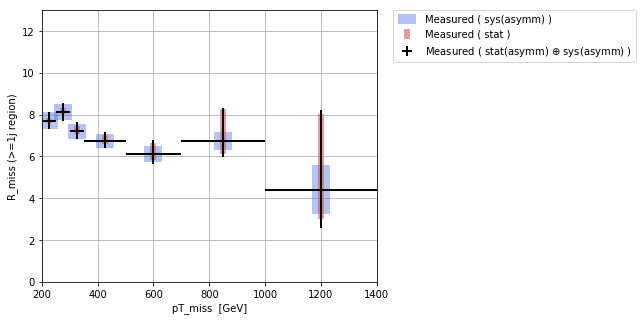

In [7]:
dataset.plot_1D_distribution("R_pT_miss_geq1j_meas",ylabel="R_miss (>=1j region)",xlabel="pT_miss  [GeV]",label="Measured",xlim=[200,1400],ylim=[0,13])

#### ... or take ratios...

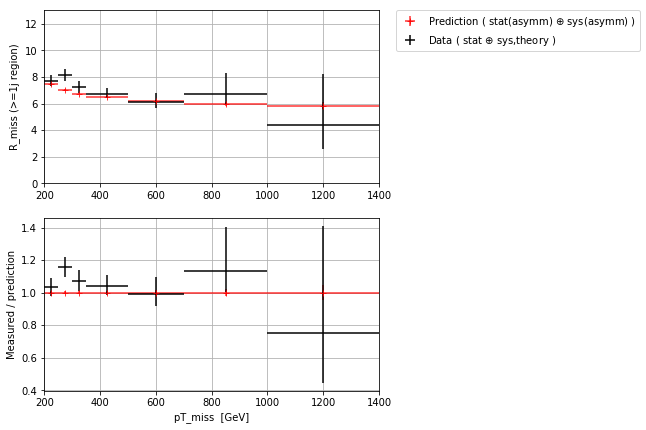

In [8]:
dataset.plot_data_vs_prediction("R_pT_miss_geq1j_meas","R_pT_miss_geq1j_exp",ylabel="R_miss (>=1j region)",xlabel="pT_miss  [GeV]",xlim=[200,1400],ylim=[0,13])

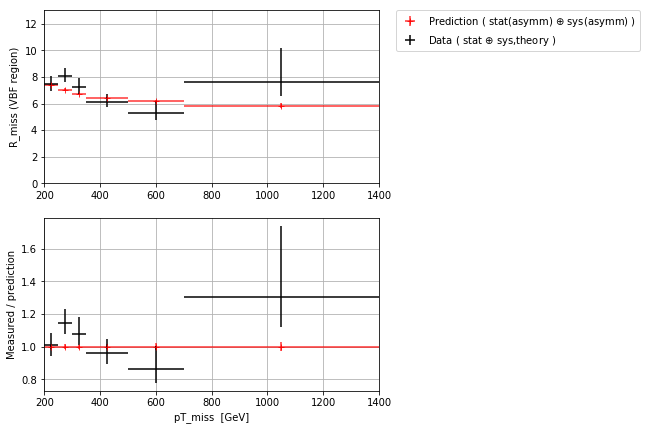

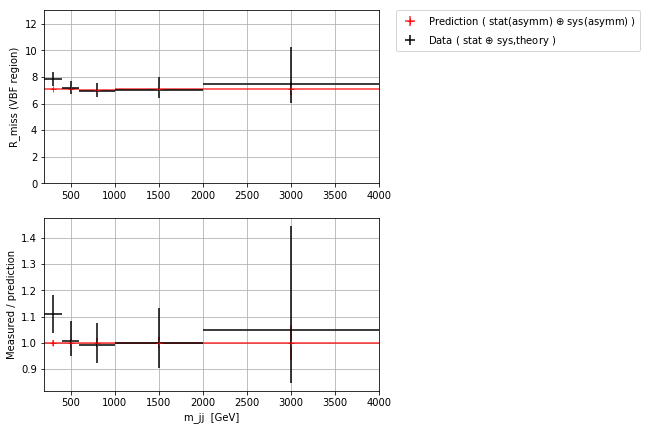

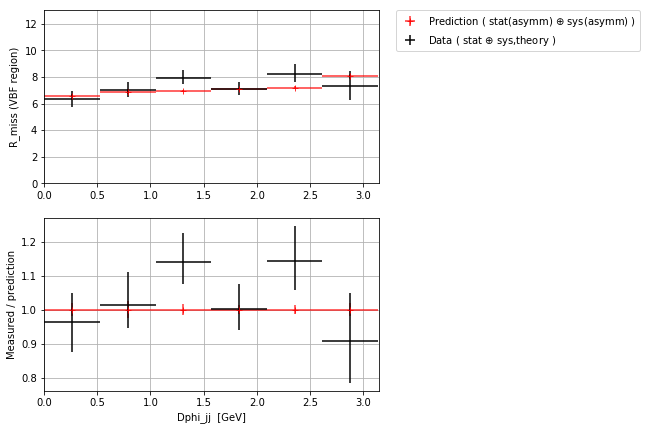

In [9]:
dataset.plot_data_vs_prediction("R_pT_miss_VBF_meas","R_pT_miss_VBF_exp",ylabel="R_miss (VBF region)",xlabel="pT_miss  [GeV]",xlim=[200,1400],ylim=[0,13])
dataset.plot_data_vs_prediction("R_m_jj_VBF_meas","R_m_jj_VBF_exp",ylabel="R_miss (VBF region)",xlabel="m_jj  [GeV]",xlim=[200,4000],ylim=[0,13])
dataset.plot_data_vs_prediction("R_dphi_jj_VBF_meas","R_dphi_jj_VBF_exp",ylabel="R_miss (VBF region)",xlabel="Dphi_jj  [GeV]",xlim=[0,3.15],ylim=[0,13])

#### ... or plot 2D distributions...

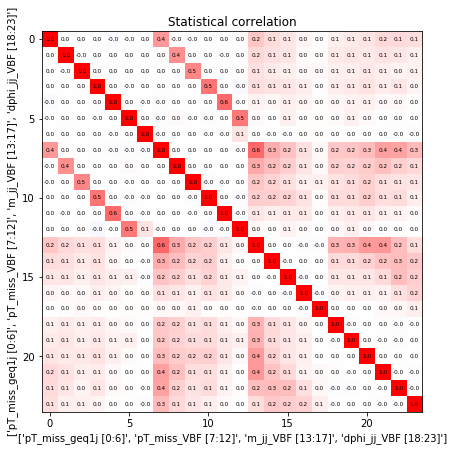

In [10]:
dataset.plot_matrix("stat_corr",title="Statistical correlation",flt_precision=1)

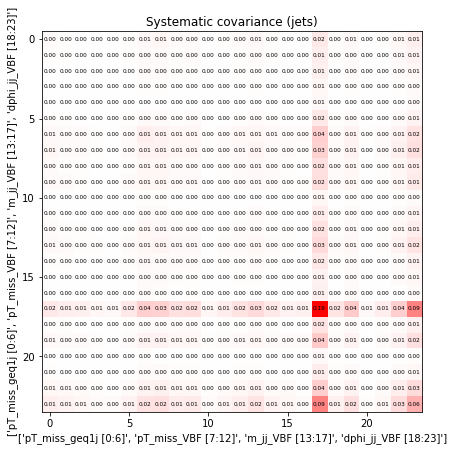

In [11]:
dataset.plot_matrix("syst_cov_jets",title="Systematic covariance (jets)",flt_precision=2)

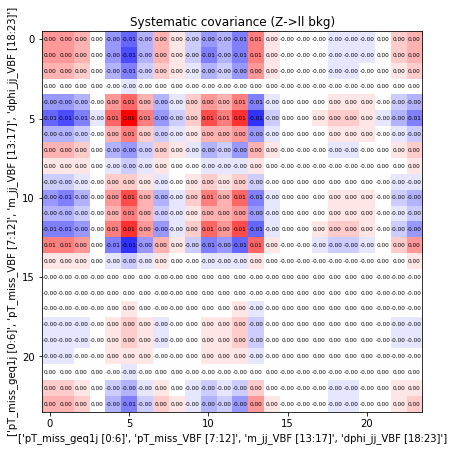

In [12]:
dataset.plot_matrix("syst_cov_Z->ll_bkg",title="Systematic covariance (Z->ll bkg)",flt_precision=2)

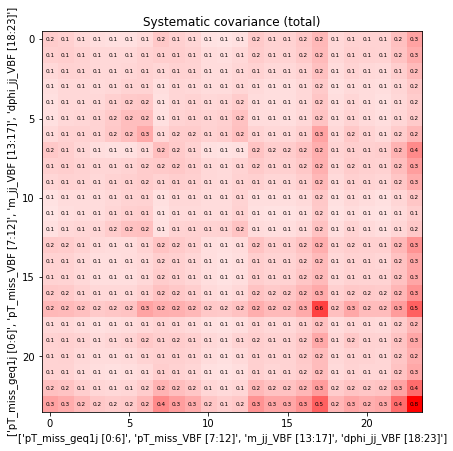

In [13]:
dataset.plot_matrix("syst_cov_total",title="Systematic covariance (total)",flt_precision=1)

#### Since our distributions and covariances are now stored in appropriate numpy arrays, it is easy-ish to calculate things like chi2. N.B. if they weren't already available, it would take a little work to construct diagonal covariance matrices from the distribution errors, but this is pretty trivial. Here we ignore the uncertainty on the SM prediction, but this could be included through linear addition of a diagonal covariance matrix (I think...)

In [14]:
measurements = np.concatenate ( ( dataset._distributions_1D["R_pT_miss_geq1j_meas"]._values , dataset._distributions_1D["R_pT_miss_VBF_meas"]._values , dataset._distributions_1D["R_m_jj_VBF_meas"]._values , dataset._distributions_1D["R_dphi_jj_VBF_meas"]._values ) )
print(measurements)

[7.71 8.12 7.21 6.74 6.12 6.74 4.4  7.5  8.06 7.21 6.13 5.32 7.61 7.86
 7.15 6.93 7.05 7.46 6.35 6.98 7.91 7.11 8.21 7.29]


In [15]:
predictions = np.concatenate ( ( dataset._distributions_1D["R_pT_miss_geq1j_exp"]._values , dataset._distributions_1D["R_pT_miss_VBF_exp"]._values , dataset._distributions_1D["R_m_jj_VBF_exp"]._values , dataset._distributions_1D["R_dphi_jj_VBF_exp"]._values ) )
print(predictions)

[7.44 7.03 6.73 6.48 6.18 5.94 5.83 7.42 7.04 6.68 6.4  6.16 5.84 7.09
 7.09 7.   7.06 7.11 6.6  6.88 6.94 7.1  7.18 8.03]


In [16]:
covariance = dataset._distributions_2D["stat_cov"]._values + dataset._distributions_2D["syst_cov_total"]._values
# print(covariance)

In [17]:
chi2 = (predictions-measurements).transpose().dot ( np.linalg.inv(covariance).dot( (predictions-measurements) ) )
msg.info("study_DM_paper.ipynb","The chi2 of the four distributions is {0:.2f}".format(chi2))
import scipy
import scipy.stats as stats
msg.info("study_DM_paper.ipynb","The Prob(chi2>{0:.2f}|ndof={1}) is {2:.2f}".format(chi2,len(measurements),stats.chi2.sf(chi2,len(measurements))))

INFO	study_DM_paper.ipynb	The chi2 of the four distributions is 32.21
INFO	study_DM_paper.ipynb	The Prob(chi2>32.21|ndof=24) is 0.12


#### We can also fit for parameters if we want to. For example, let's say I have a BSM signal which does not interfere with the SM. Then...

In [21]:
pT_miss_geq1_BSM = [ 0.1 , 0.1 , 0.1 , 0.2 , 0.3 , 0.7 , 1.5 ]
pT_miss_VBF_BSM = [ 0.1 , 0.1 , 0.2 , 0.2 , 0.3 , 0.4 ]
m_jj_VBF_BSM = [ 0.3 , 0.1 , 0. , 0.7 , 0.1  ]
dphi_jj_VBF_BSM = [ 0.4 , 0.2 , 0.1 , 0.1 , 0.3 , 0.4 ]
pred_BSM = np.concatenate((pT_miss_geq1_BSM,pT_miss_VBF_BSM,m_jj_VBF_BSM,dphi_jj_VBF_BSM))
def chi2_func ( p ) :
    pred_tot = predictions + p[0]*pred_BSM
    res = pred_tot - measurements
    return res.transpose().dot( np.linalg.inv(covariance).dot(res) )
params = np.array([1.])
best_chi2 = scipy.optimize.minimize(chi2_func, params,method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
print(best_chi2)
y_best = best_chi2["fun"]
x_best = best_chi2["x"][0]

Optimization terminated successfully.
         Current function value: 31.542997
         Iterations: 29
         Function evaluations: 59
 final_simplex: (array([[0.42539687],
       [0.42539688]]), array([31.54299712, 31.54299712]))
           fun: 31.542997121444415
       message: 'Optimization terminated successfully.'
          nfev: 59
           nit: 29
        status: 0
       success: True
             x: array([0.42539687])


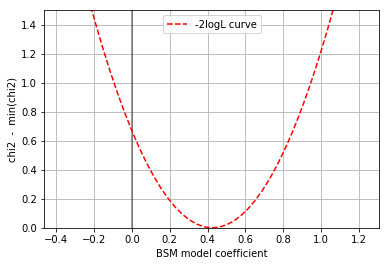

In [47]:
x = [x_best*(-0.9+0.09*i) for i in range(43)]
y = [chi2_func([x[i]]) for i in range(43)]
y = y - y_best
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,0,2), np.linspace(0, 1.5, 2), c='k', alpha=0.5)
plt.plot(x,y,"--",color='r',label="-2logL curve")
plt.xlabel("BSM model coefficient")
plt.ylabel("chi2  -  min(chi2)")
plt.ylim(0,1.5)
plt.legend(loc="upper center")
plt.grid()
plt.show()

In [48]:
param_err_down = x_best - [ mu for mu,val in zip(x,y) if val < 1][0]
param_err_up = [ mu for mu,val in zip(x,y) if val < 1].pop() - x_best
msg.info("study_DM_paper.ipynb","BSM model coefficient is {0:.2f} + {1:.2f} - {2:.2f}".format(x_best,param_err_up,param_err_down))

INFO	study_DM_paper.ipynb	BSM model coefficient is 0.43 + 0.49 - 0.50
